In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import os

In [2]:
DAY_NIGHT_DATASET_PATH = "/Users/rsurridge/math-for-ml/Solar-ML-Forecast/datasets/hourly_day_and_night_weather.csv"
DAY_DATASET_PATH = "/Users/rsurridge/math-for-ml/Solar-ML-Forecast/datasets/hourly_day_only_weather.csv"

day_night_solar_df = pd.read_csv(DAY_NIGHT_DATASET_PATH, sep=",", index_col=0)
day_night_solar_df = day_night_solar_df.iloc[:, :10]
print(day_night_solar_df.head())

X_day_night = day_night_solar_df.iloc[:, :-1].values
y_day_night = day_night_solar_df.iloc[:, -1].values

day_solar_df = pd.read_csv(DAY_DATASET_PATH, sep=",", index_col=1)
day_solar_df = day_solar_df.iloc[:, 1:]
day_solar_df = day_solar_df.iloc[:, :10]
print(day_solar_df.head())

X_day = day_solar_df.iloc[:, :-1].values
y_day = day_solar_df.iloc[:, -1].values

         Hour  Cloud coverage  Visibility  Temperature  Dew point   
Date                                                                
1/31/16    24             0.0        5.00         1.40       0.89  \
2/1/16      1             0.0        7.88         1.16       0.62   
2/1/16      2             0.0        9.84         1.22       0.96   
2/1/16      3             0.0        9.84         1.02       0.61   
2/1/16      4             0.0        9.88         0.83       0.45   

         Relative humidity  Wind speed  Station pressure  Altimeter   
Date                                                                  
1/31/16              95.56        9.00             29.10      29.89  \
2/1/16               91.04        7.04             29.11      29.90   
2/1/16               89.28        8.96             29.12      29.91   
2/1/16               89.12        6.36             29.14      29.93   
2/1/16               90.08        6.12             29.15      29.94   

         Solar ene

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Day and Night Dataset
Overall Best K-Fold: 3
Overall Best MSE: 300231.0452155997


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


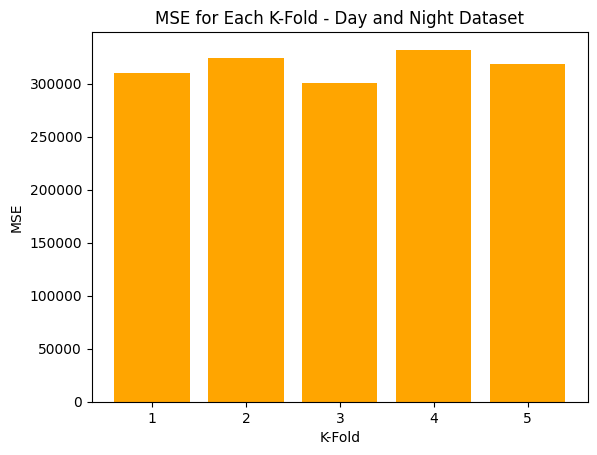

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Day Only Dataset
Overall Best K-Fold: 1
Overall Best MSE: 841949.2449218219


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


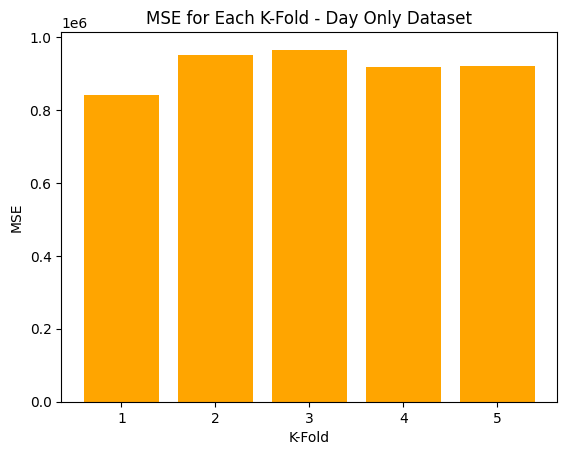

In [7]:
save_dir = 'neural_network_plots'
os.makedirs(save_dir, exist_ok=True)

kf = KFold(n_splits=5, shuffle=True)

best_mse_day_night = float('inf')
mse_values_day_night = []

for fold, (train_index, val_index) in enumerate(kf.split(X_day_night, y_day_night)):

    X_train_fold, X_val_fold = X_day_night[train_index], X_day_night[val_index]
    y_train_fold, y_val_fold = y_day_night[train_index], y_day_night[val_index]

    mlp_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=100, random_state=42)
    mlp_model.fit(X_train_fold, y_train_fold)

    val_predicted = mlp_model.predict(X_val_fold)

    fold_mse = np.mean((val_predicted - y_val_fold) ** 2)
    mse_values_day_night.append(fold_mse)

    if fold_mse < best_mse_day_night:
        best_mse_day_night = fold_mse
        best_fold_day_night = fold

print("Day and Night Dataset")
print(f"Overall Best K-Fold: {best_fold_day_night + 1}")
print(f"Overall Best MSE: {best_mse_day_night}")

plt.bar(range(1, 6), mse_values_day_night, color='orange')
plt.xlabel('K-Fold')
plt.ylabel('MSE')
plt.title('MSE for Each K-Fold - Day and Night Dataset')
plt.savefig(os.path.join(save_dir, f'day_night_kfold_mse.png'))
plt.show()

best_mse_day_only = float('inf')
mse_values_day_only = []

for fold, (train_index, val_index) in enumerate(kf.split(X_day, y_day)):

    X_train_fold, X_val_fold = X_day[train_index], X_day[val_index]
    y_train_fold, y_val_fold = y_day[train_index], y_day[val_index]

    mlp_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=100, random_state=42)
    mlp_model.fit(X_train_fold, y_train_fold)

    val_predicted = mlp_model.predict(X_val_fold)

    fold_mse = np.mean((val_predicted - y_val_fold) ** 2)
    mse_values_day_only.append(fold_mse)

    if fold_mse < best_mse_day_only:
        best_mse_day_only = fold_mse
        best_fold_day_only = fold

print("Day Only Dataset")
print(f"Overall Best K-Fold: {best_fold_day_only + 1}")
print(f"Overall Best MSE: {best_mse_day_only}")

plt.bar(range(1, 6), mse_values_day_only, color='orange')
plt.xlabel('K-Fold')
plt.ylabel('MSE')
plt.title('MSE for Each K-Fold - Day Only Dataset')
plt.savefig(os.path.join(save_dir, f'day_only_kfold_mse.png'))
plt.show()

In [4]:
def moving_average(data, n=100):
    cumsum = np.cumsum(data, dtype=float)
    cumsum[n:] = cumsum[n:] - cumsum[:-n]
    return cumsum[n - 1:] / n

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


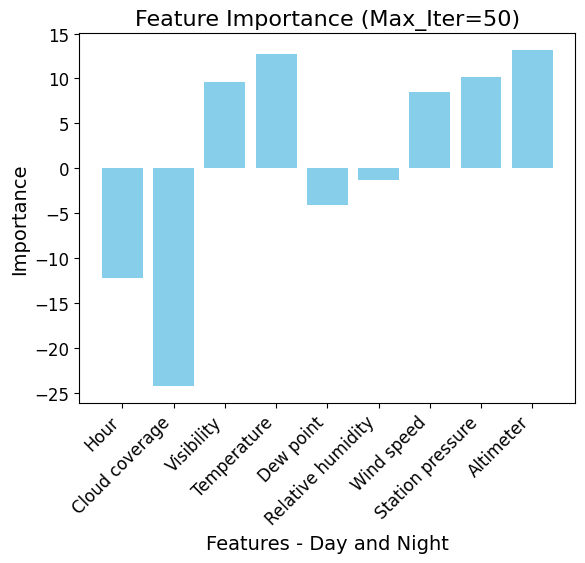

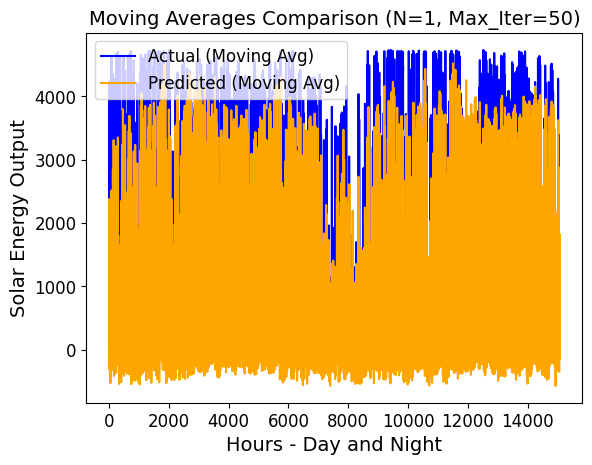

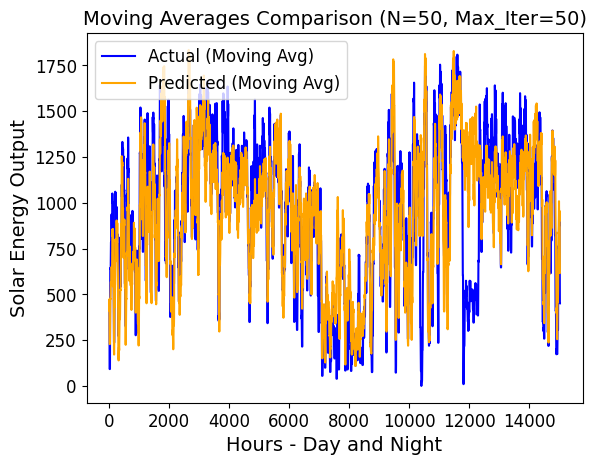

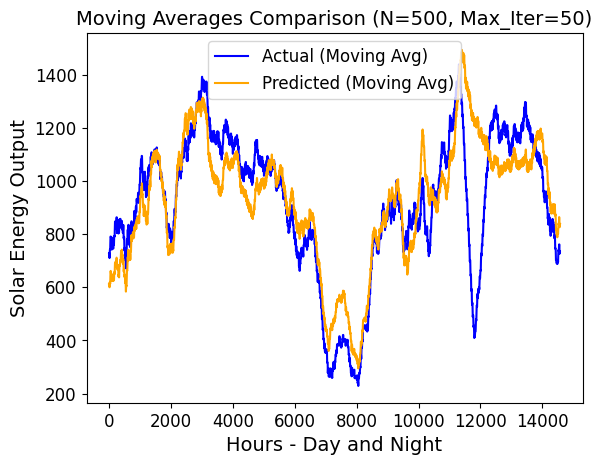

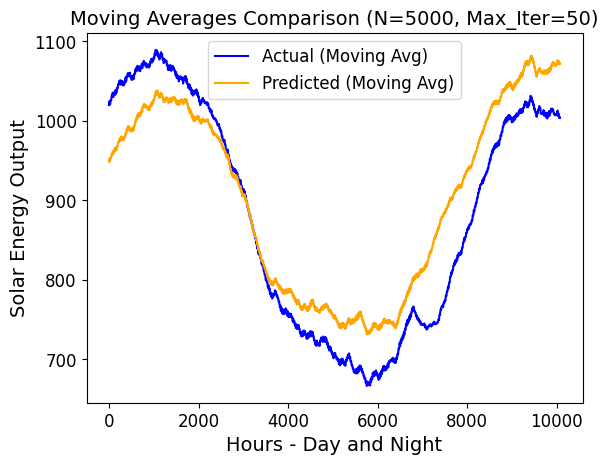

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


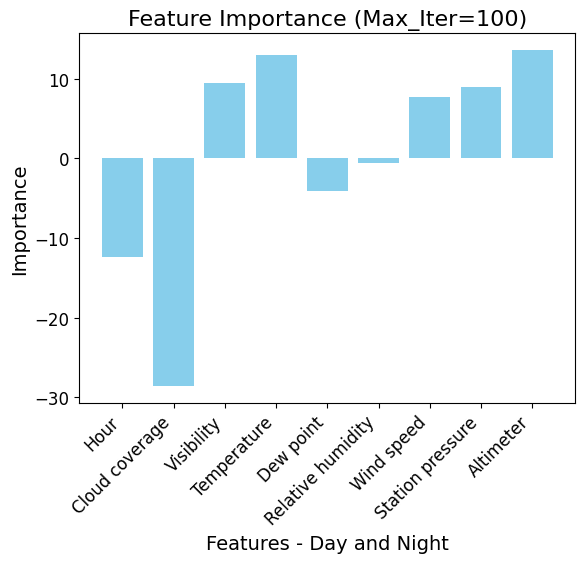

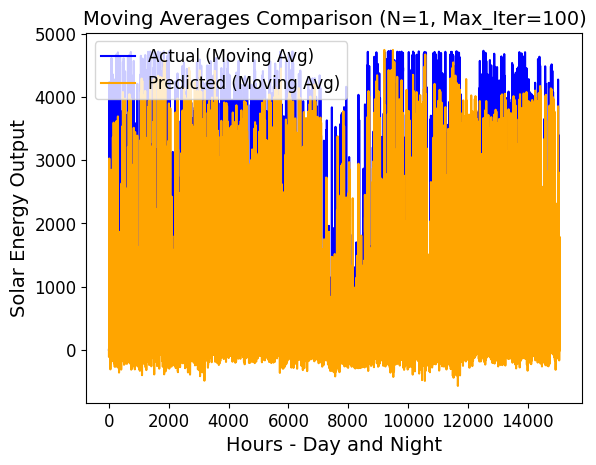

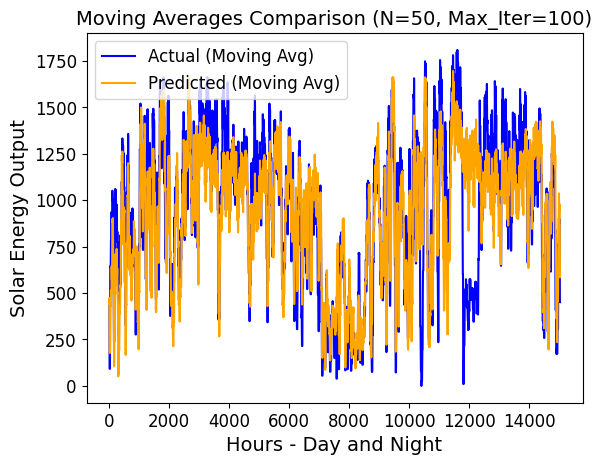

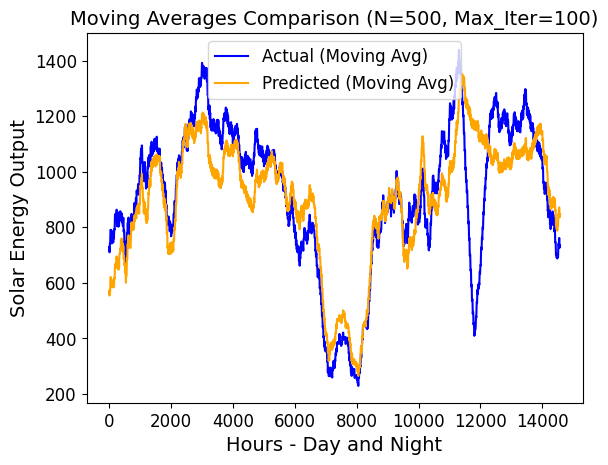

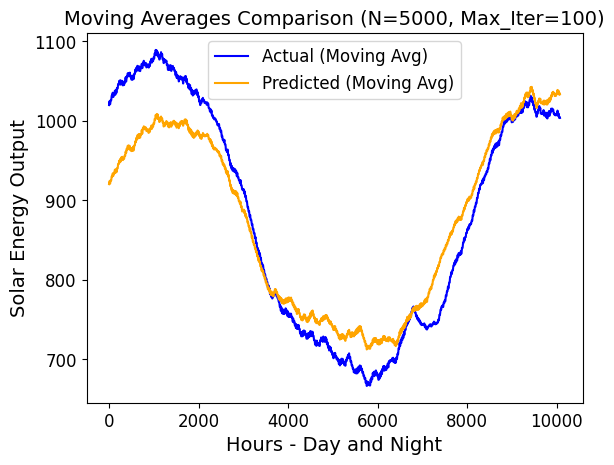

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


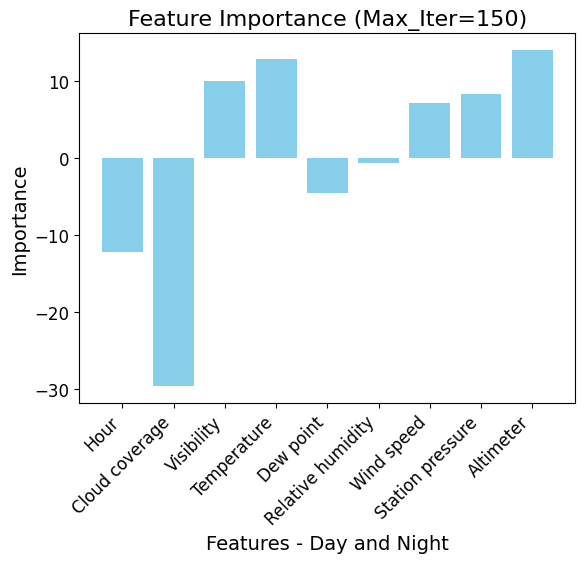

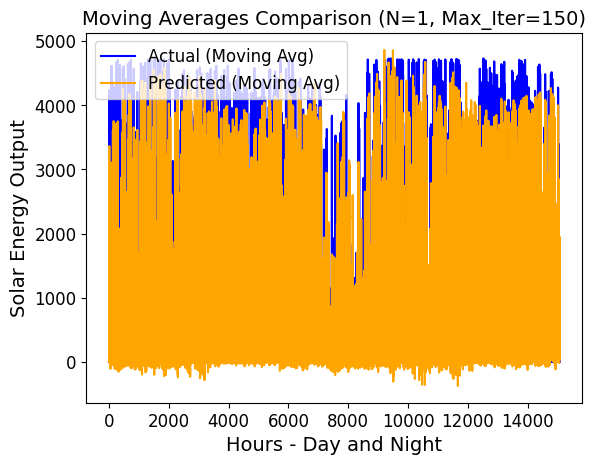

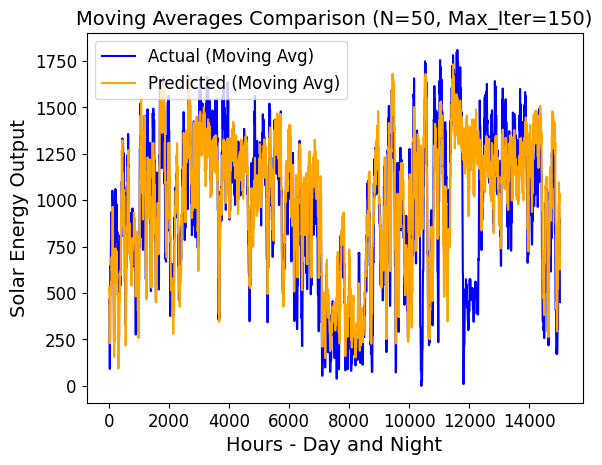

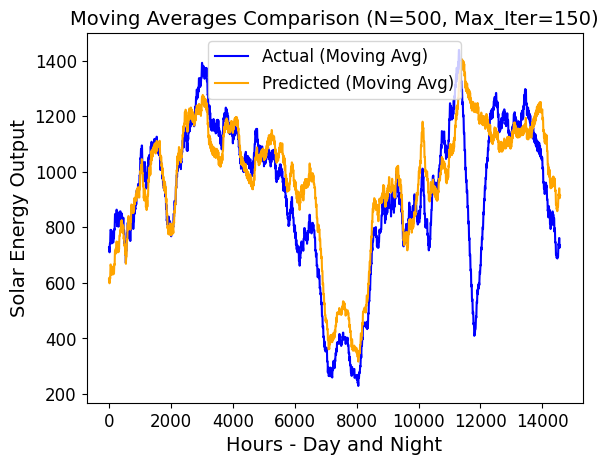

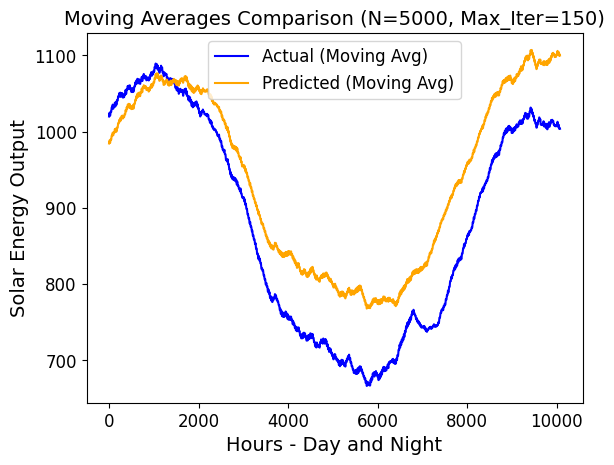

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


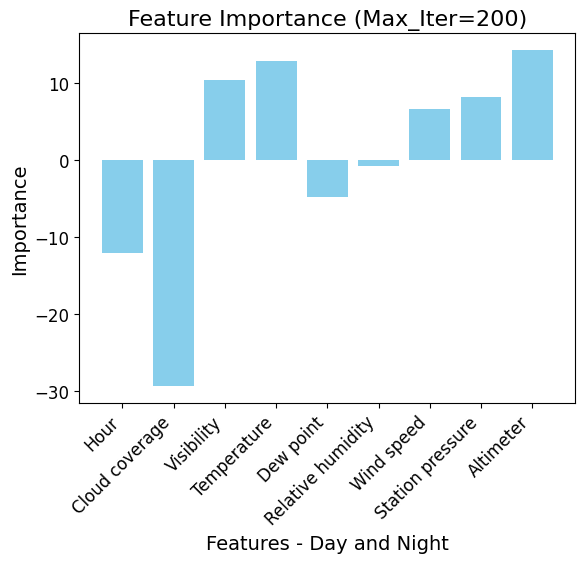

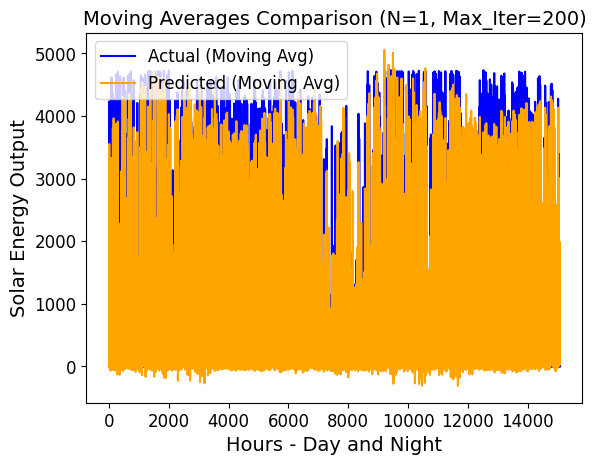

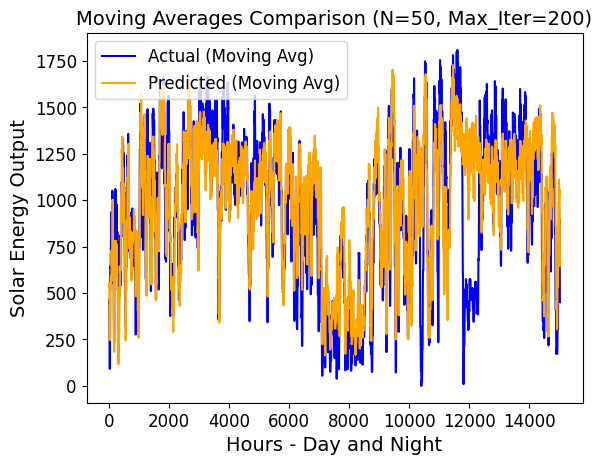

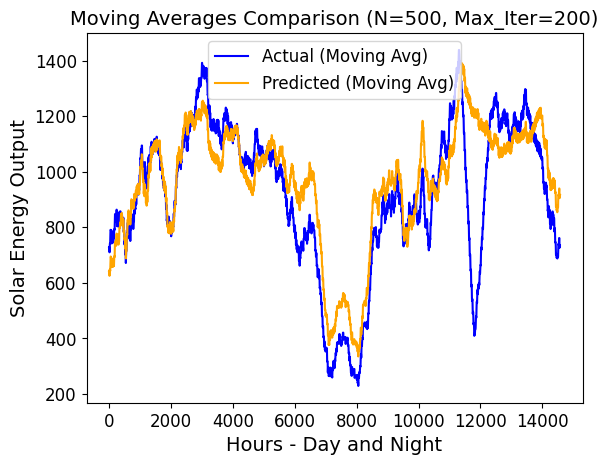

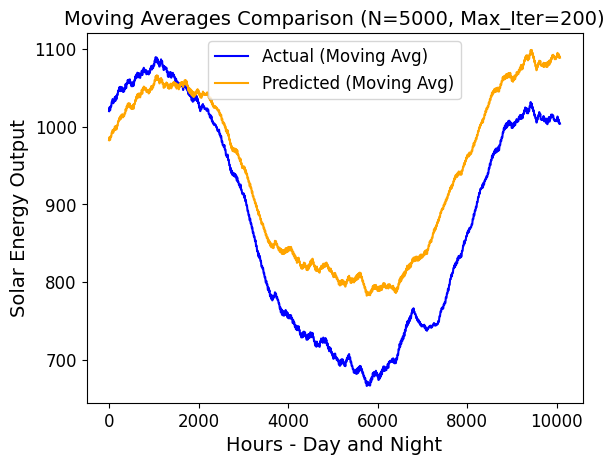

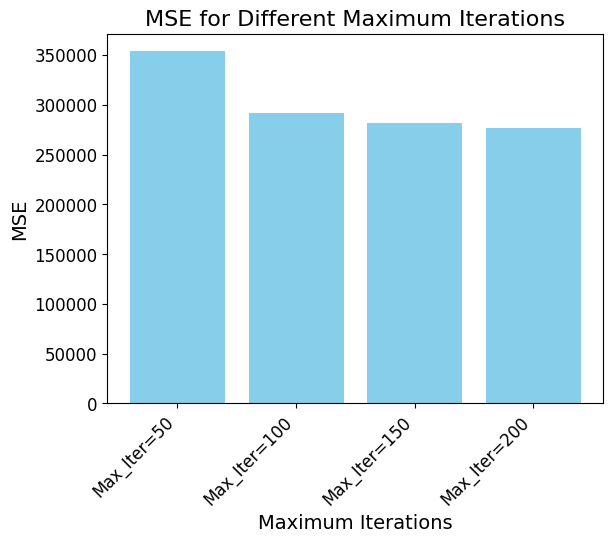

In [5]:
best_mse = float('inf')
best_params = None

mse_values = []
max_iter_lst = [50, 100, 150, 200]

for max_iter in max_iter_lst:

    final_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=max_iter, random_state=42)
    final_model.fit(X_day_night, y_day_night)
    final_model_predicted = final_model.predict(X_day_night)
    mse = mean_squared_error(y_day_night, final_model_predicted)
    mse_values.append(mse)

    if mse < best_mse:
            best_mse = mse
            best_iter = {'max_iter': max_iter}

    feature_importance = final_model.coefs_[0].sum(axis=1)
    feature_names = day_night_solar_df.columns[:9].tolist()

    plt.bar(feature_names, feature_importance, color='skyblue')
    plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha='right')
    plt.title(f'Feature Importance (Max_Iter={max_iter})', fontsize=16)
    plt.xlabel('Features - Day and Night', fontsize=14)
    plt.ylabel('Importance', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.savefig(os.path.join(save_dir, f'day_night_feature_importance_{max_iter}.png'))
    plt.show()
    
    for n in [1, 50, 500, 5000]:

        y_avg = moving_average(y_day_night, n)
        predicted_avg = moving_average(final_model_predicted, n)

        plt.plot(y_avg, label='Actual (Moving Avg)', color='blue')
        plt.plot(predicted_avg, label='Predicted (Moving Avg)', color='orange')

        plt.title(f'Moving Averages Comparison (N={n}, Max_Iter={max_iter})', fontsize=14)
        plt.xlabel('Hours - Day and Night', fontsize=14)
        plt.ylabel('Solar Energy Output', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.legend(fontsize=12)

        plt.savefig(os.path.join(save_dir, f'day_night_{n}_{max_iter}.png'))
        plt.show()

plt.bar(range(len(mse_values)), mse_values, color='skyblue')
plt.xticks(range(len(mse_values)), [f'Max_Iter={max_iter}' for max_iter in max_iter_lst], rotation=45, ha='right')
plt.title('MSE for Different Maximum Iterations', fontsize=16)
plt.xlabel('Maximum Iterations', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig(os.path.join(save_dir, 'day_night_mse_bar_plot.png'))
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


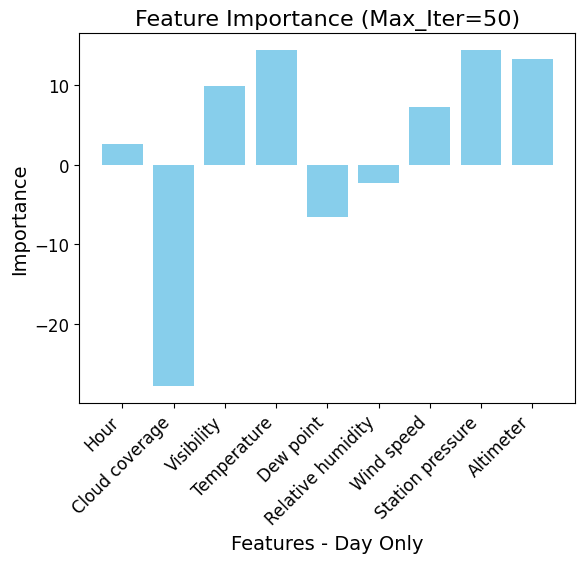

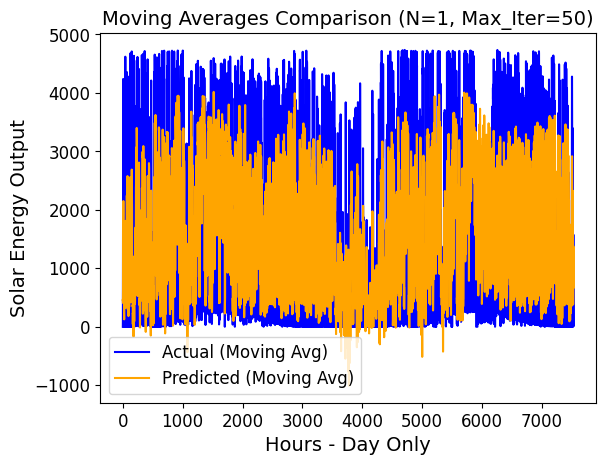

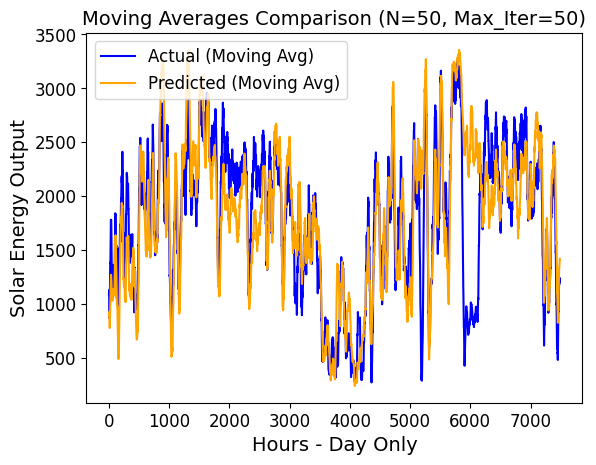

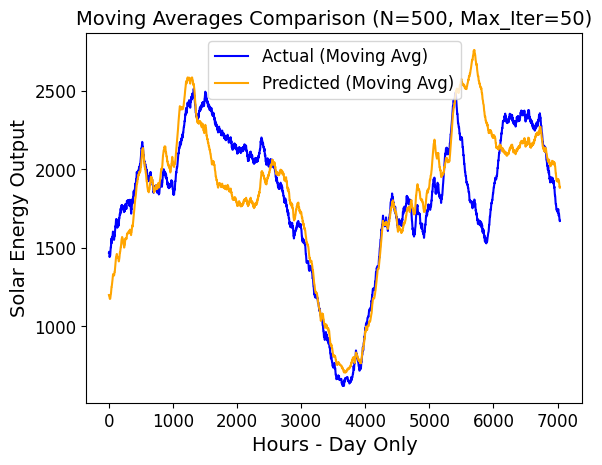

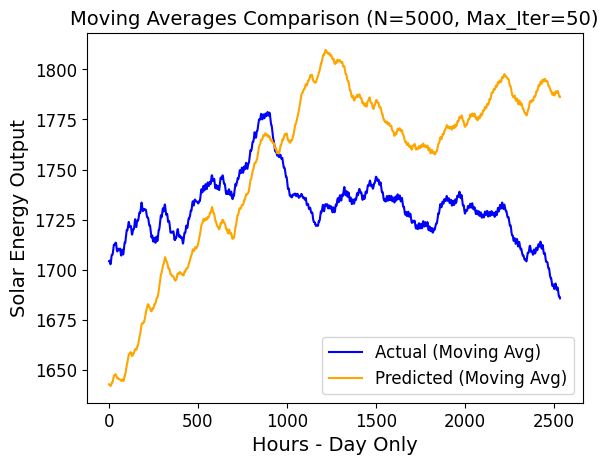

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


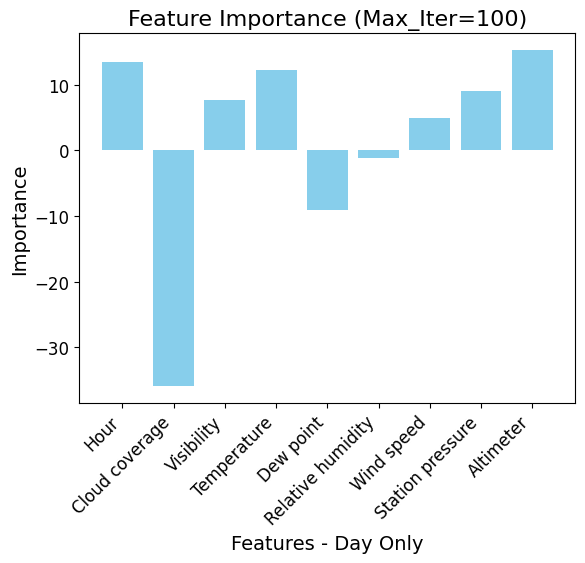

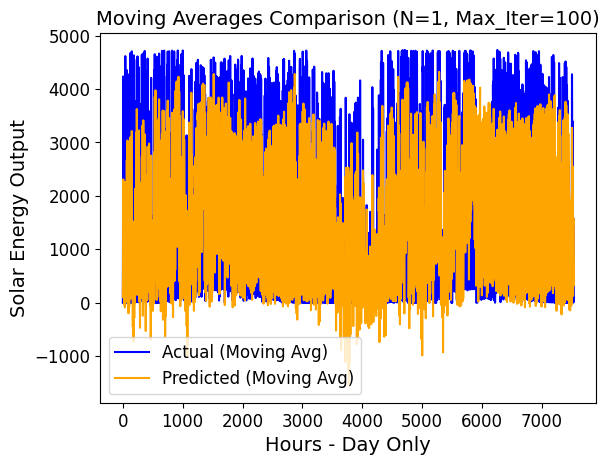

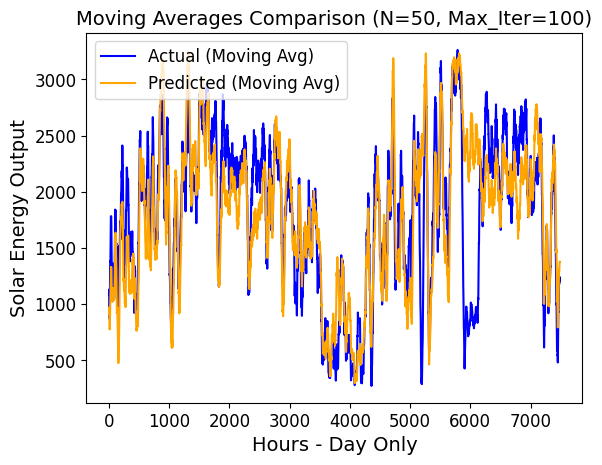

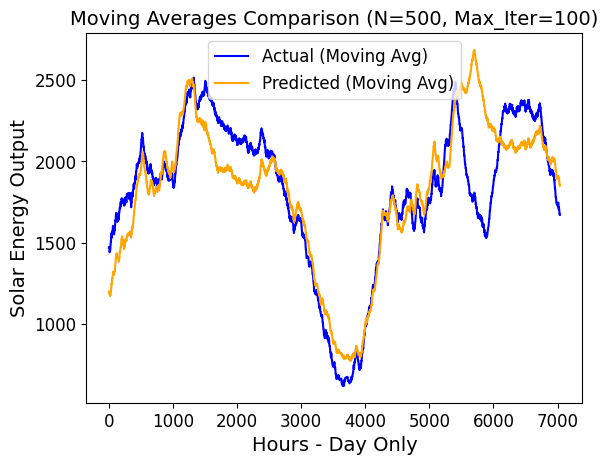

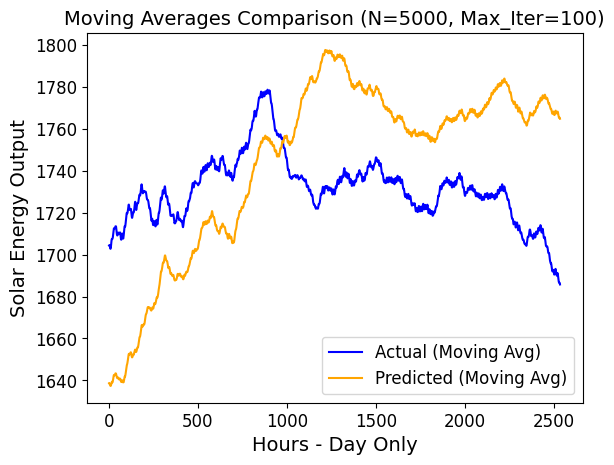

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


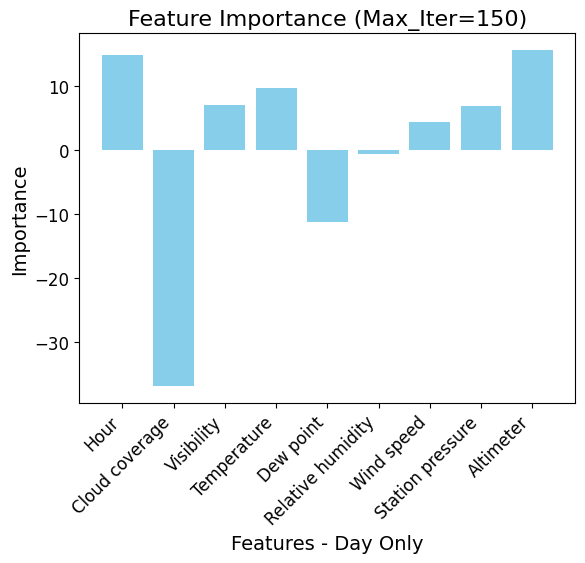

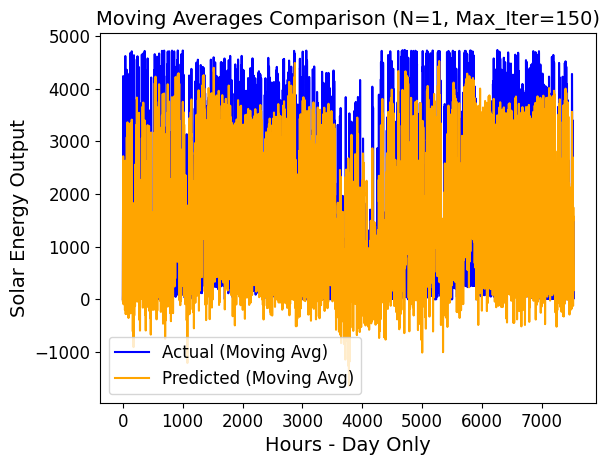

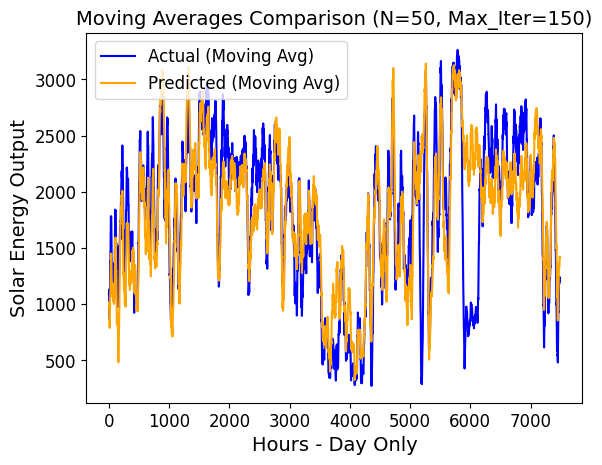

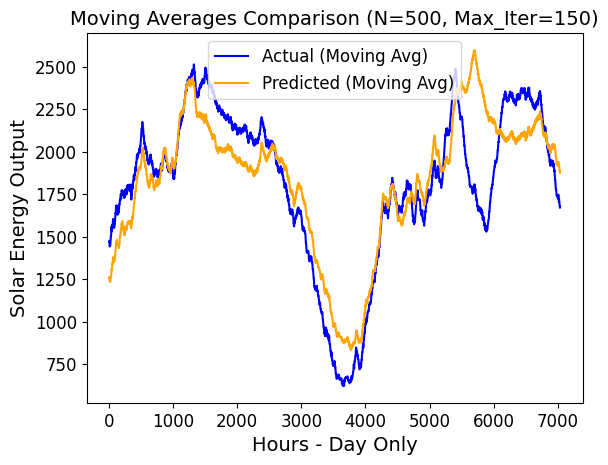

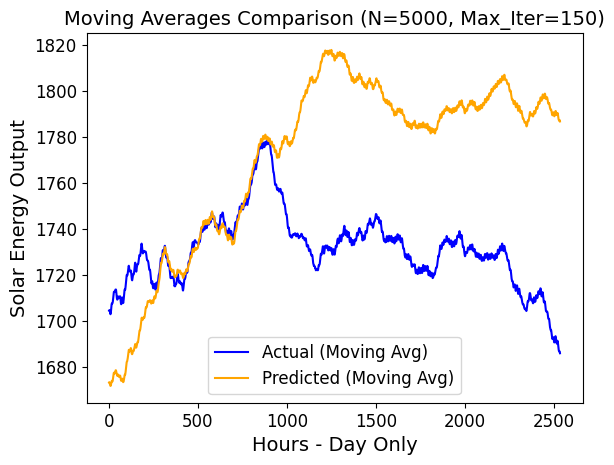

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


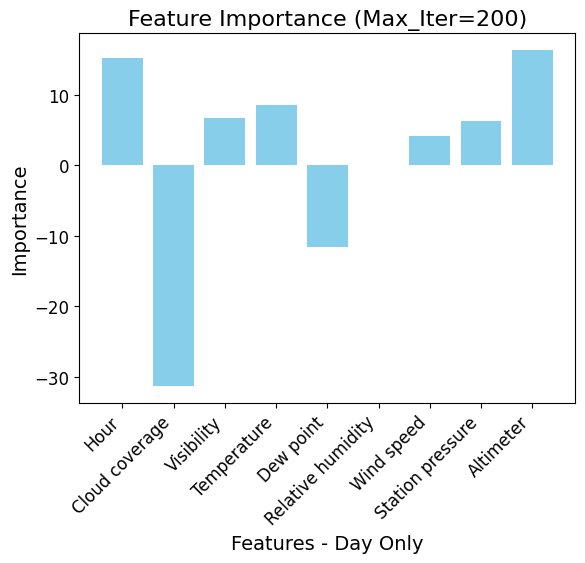

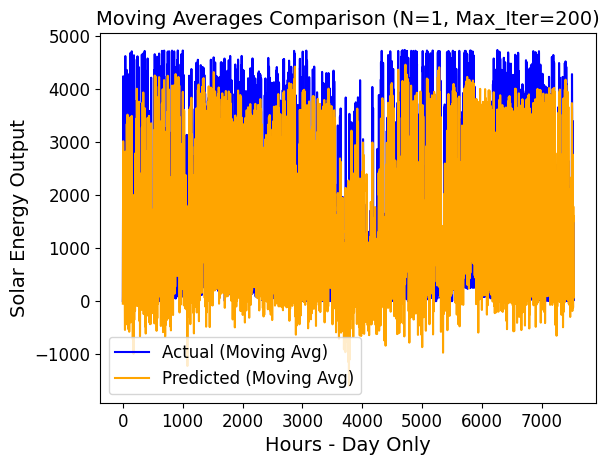

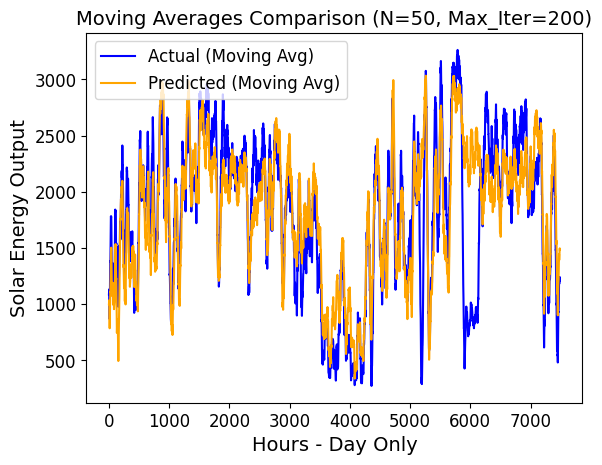

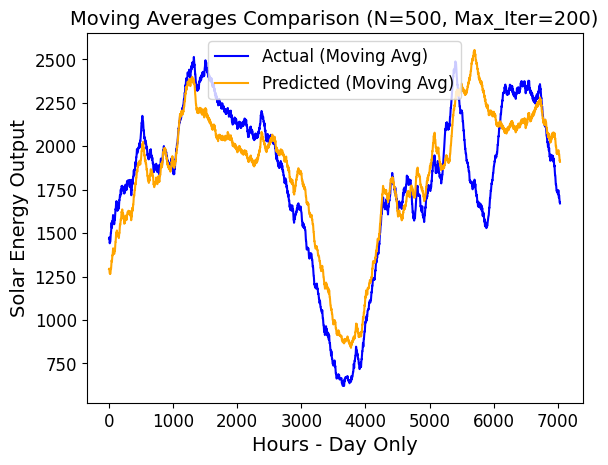

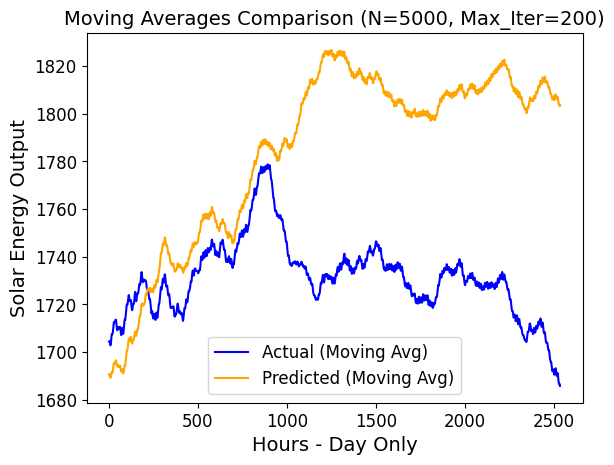

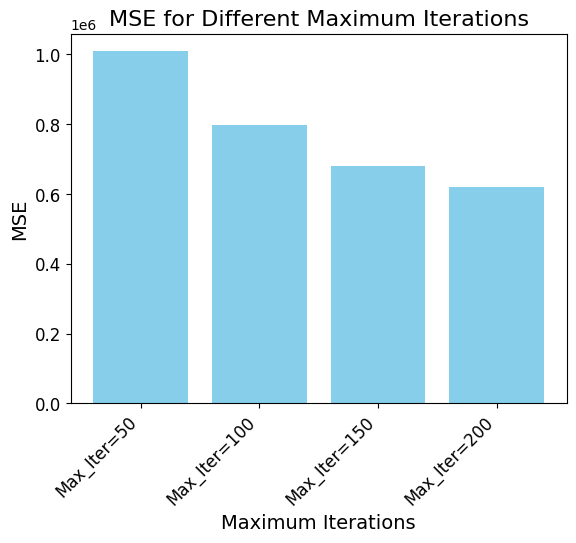

In [6]:
save_dir = 'neural_network_plots'
os.makedirs(save_dir, exist_ok=True)

best_mse = float('inf')
best_params = None

mse_values = []
max_iter_lst = [50, 100, 150, 200]

for max_iter in max_iter_lst:

    final_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=max_iter, random_state=42)
    final_model.fit(X_day, y_day)
    final_model_predicted = final_model.predict(X_day)
    mse = mean_squared_error(y_day, final_model_predicted)
    mse_values.append(mse)

    if mse < best_mse:
            best_mse = mse
            best_iter = {'max_iter': max_iter} 
        
    feature_importance = final_model.coefs_[0].sum(axis=1)
    feature_names = day_solar_df.columns[:9].tolist()

    plt.bar(feature_names, feature_importance, color='skyblue')
    plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha='right')
    plt.title(f'Feature Importance (Max_Iter={max_iter})', fontsize=16)
    plt.xlabel('Features - Day Only', fontsize=14)
    plt.ylabel('Importance', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.savefig(os.path.join(save_dir, f'day_only_feature_importance_{max_iter}.png'))
    plt.show()    
    
    for n in [1, 50, 500, 5000]:

        y_avg = moving_average(y_day, n)
        predicted_avg = moving_average(final_model_predicted, n)

        plt.plot(y_avg, label='Actual (Moving Avg)', color='blue')
        plt.plot(predicted_avg, label='Predicted (Moving Avg)', color='orange')

        plt.title(f'Moving Averages Comparison (N={n}, Max_Iter={max_iter})', fontsize=14)
        plt.xlabel('Hours - Day Only', fontsize=14)
        plt.ylabel('Solar Energy Output', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.legend(fontsize=12)

        plt.savefig(os.path.join(save_dir, f'day_only_{n}_{max_iter}.png'))
        plt.show()

plt.bar(range(len(mse_values)), mse_values, color='skyblue')
plt.xticks(range(len(mse_values)), [f'Max_Iter={max_iter}' for max_iter in max_iter_lst], rotation=45, ha='right')
plt.title('MSE for Different Maximum Iterations', fontsize=16)
plt.xlabel('Maximum Iterations', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig(os.path.join(save_dir, 'day_only_mse_bar_plot.png'))
plt.show()